In [10]:
#pip install nbformat

In [1]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
print(torch.__version__)

2.0.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
from pathlib import Path
current_directory = Path.cwd()

# Get the parent directory (one level up)
parent_directory = current_directory.parent
    
    
path_to_dataset =str(parent_directory)+'/captcha_dataset'

captchas = os.listdir(path_to_dataset)

Y = []
X = []
# png's are 3D and 4D but all dimension are the same execpt for the 4th which is all balck
# only turn png into array and keep the first dimension
for i,img_name in enumerate(captchas):
    Y.append(img_name[:5])

    new_path = path_to_dataset + '/' + captchas[i]

    image = Image.open(new_path)

    array_image = np.array(image) 

    X.append(array_image[:,:,0])

  

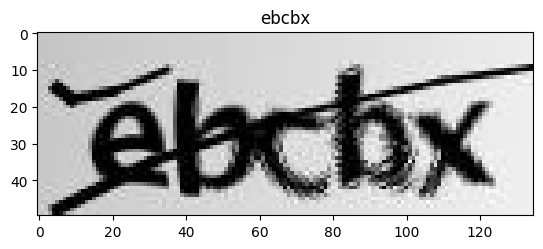

In [27]:
rand_pic = np.random.randint(0,len(Y))
plt.imshow(X[rand_pic][:,15:150],cmap='gray')
plt.title(Y[rand_pic])
plt.show()

In [4]:
import string

all_characters= list(string.ascii_lowercase) + list(string.digits)

print(all_characters)

nchar = len(all_characters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
# make label array

y = np.zeros((5,len(Y),nchar)) #5*1070*36(5 letters in captcha) with all entries 0

for i,captcha in enumerate(Y):
   
  temp_label =np.zeros((5,nchar))

  for j, character in enumerate(captcha):
     
      character_index =  all_characters.index(character)
      temp_label[j,character_index] = 1
  y[:,i] = temp_label

In [ ]:
class_dict = {}
for i, charac in enumerate(list(range(10)) + list(string.ascii_lowercase)) :

    class_dict[i] = str(charac)
class_dict

In [45]:
class CaptchaDataset(Dataset):
  
  def __init__(self,car_path,transform,translation_dict):
    self.path = car_path
    self.folder = [x for x in listdir(car_path)]
    self.transform = transform
    self.translation_dict = translation_dict

  def __len__(self):
    return len(self.folder)

  def __getitem__(self,idx):
    img_loc = os.path.join(self.path, self.folder[idx])
    image = Image.open(img_loc).convert('RGB')
    single_img = self.transform(image)

    label1 = translation_dict[self.folder[idx]][0]
    label2 = translation_dict[self.folder[idx]][1]
    label3 = translation_dict[self.folder[idx]][2]
    label4 = translation_dict[self.folder[idx]][3]
    label5 = translation_dict[self.folder[idx]][4]
    

    sample = {'image':single_img, 'labels': {'label_brand':label1, 'label_vehicle_type':label2, 'label_epoch':label3}}
    return sample   
